# **Exercise 1: HOG (Histogram of Oriented Gradients) Object Detection**

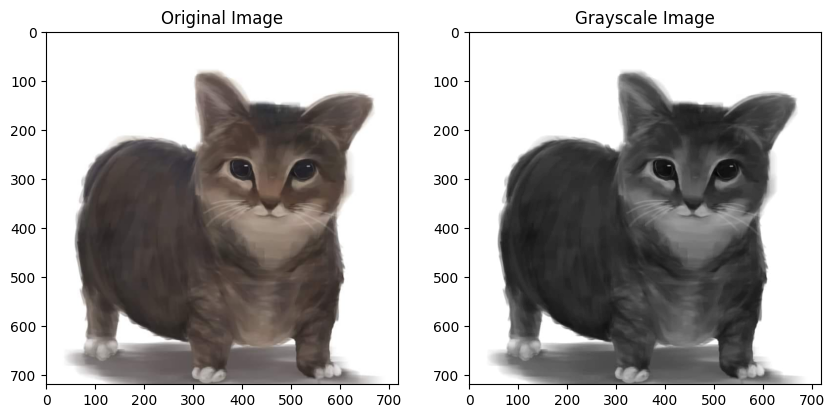

In [7]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Load the image
image_path = "4b_VENANCIO_EXER4_KEYPOINTS.jpg"  # Replace with your image path or upload it to Colab
image = cv2.imread(image_path)

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.show()


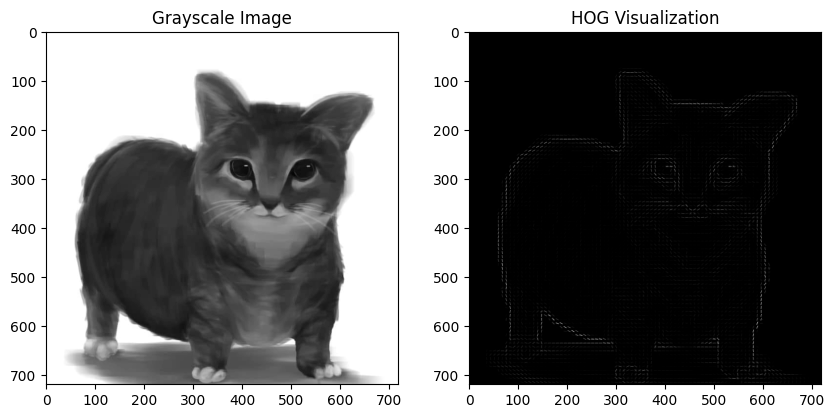

In [8]:
# Apply HOG descriptor without 'multichannel' parameter
hog_features, hog_image = hog(
    gray_image,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm="L2-Hys",
    visualize=True
)

# Display HOG features (gradient orientations) on the image
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")

plt.subplot(1,2,2)
plt.imshow(hog_image, cmap="gray")
plt.title("HOG Visualization")
plt.show()


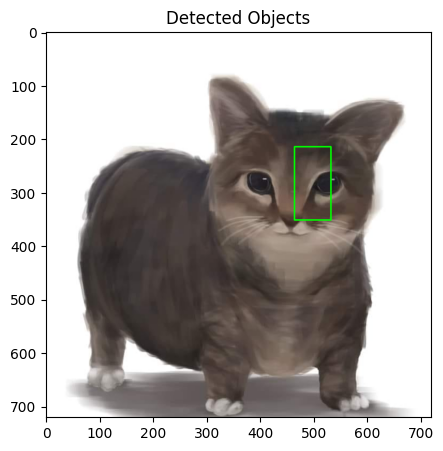

In [9]:
# Initialize HOG descriptor with a pre-trained SVM model for people detection
hog_descriptor = cv2.HOGDescriptor()
hog_descriptor.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Detect objects in the image
(rects, weights) = hog_descriptor.detectMultiScale(gray_image, winStride=(4, 4), padding=(8, 8), scale=1.05)

# Draw bounding boxes around detected objects
for (x, y, w, h) in rects:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the detected results
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Objects")
plt.show()


# **Exercise 2: YOLO (You Only Look Once) Object Detection**

Step 1: Install Required Libraries

In [6]:
!pip install tensorflow
!pip install opencv-python
!pip install matplotlib
!pip install pillow


Step 2: Download the YOLOv3 Model Files

In [16]:
# Clean up any existing files to avoid conflicts
!rm -f yolov3.cfg yolov3.weights coco.names

# Download YOLOv3 configuration, weights, and class names from the official YOLO website
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -O yolov3.cfg
!wget https://pjreddie.com/media/files/yolov3.weights -O yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -O coco.names


--2024-11-02 01:12:46--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2024-11-02 01:12:46 (69.9 MB/s) - ‘yolov3.cfg’ saved [8342/8342]

--2024-11-02 01:12:46--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  1.98MB/s    in 1m 54s  

2024-11-02 01:1

In [17]:
# Check if files are downloaded
!ls -l yolov3.cfg yolov3.weights coco.names


-rw-r--r-- 1 root root       625 Nov  2 01:14 coco.names
-rw-r--r-- 1 root root      8342 Nov  2 01:12 yolov3.cfg
-rw-r--r-- 1 root root 248007048 Dec  7  2023 yolov3.weights


Step 3: Load YOLO Model with OpenCV

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Define the layer names and get the output layers
layer_names = net.getLayerNames()
# Ensure to properly extract output layers
output_layers_indices = net.getUnconnectedOutLayers()  # Get output layer indices
output_layers = [layer_names[i - 1] for i in output_layers_indices.flatten()]  # Use flatten to ensure correct indexing

# Load the COCO class labels
with open('coco.names', 'r') as f:
    class_names = [line.strip() for line in f.readlines()]

print("YOLO model loaded successfully.")


YOLO model loaded successfully.


Step 4: Run Object Detection on Image

In [20]:
# Load an example image
image_path = "path_to_your_image.jpg"  # Replace with your image path
image = cv2.imread(image_path)

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Define the detection function (as previously mentioned)
def detect_objects_yolo(image):
    height, width, _ = image.shape

    # Prepare the image for the model
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outputs = net.forward(output_layers)

    boxes = []
    confidences = []
    class_ids = []

    # Process the outputs
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:  # Confidence threshold
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Non-maximum suppression to eliminate redundant overlapping boxes
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(class_names[class_ids[i]])
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return image

# Perform detection
output_image = detect_objects_yolo(image)

# Display results
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Objects")
plt.axis('off')
plt.show()


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


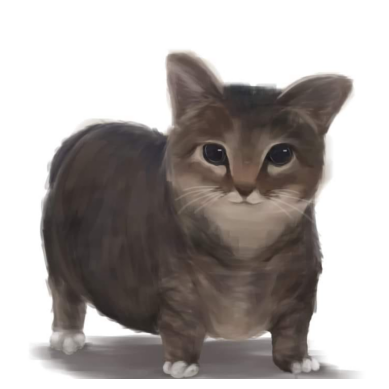

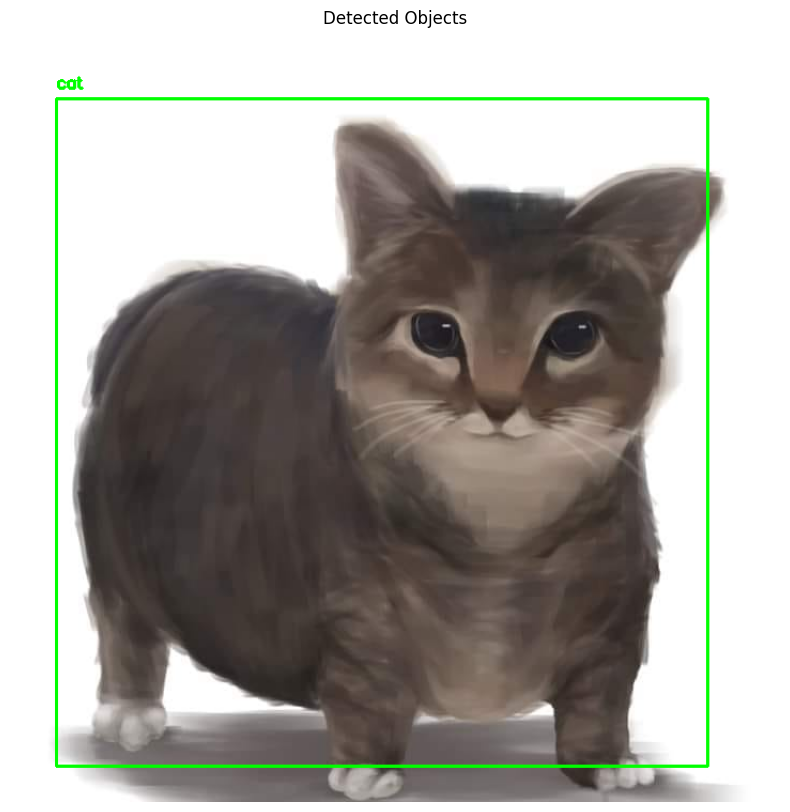

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Define the layer names and get the output layers
layer_names = net.getLayerNames()
output_layers_indices = net.getUnconnectedOutLayers()  # Get output layer indices
output_layers = [layer_names[i - 1] for i in output_layers_indices.flatten()]

# Load the COCO class labels
with open('coco.names', 'r') as f:
    class_names = [line.strip() for line in f.readlines()]

# Load the image
image_path = "4b_VENANCIO_EXER4_KEYPOINTS.jpg"  # Ensure this is the correct path to your image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from path: {image_path}")
else:
    # Display the image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Define the detection function
    def detect_objects_yolo(image):
        height, width, _ = image.shape

        # Prepare the image for the model
        blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        net.setInput(blob)
        outputs = net.forward(output_layers)

        boxes = []
        confidences = []
        class_ids = []

        # Process the outputs
        for output in outputs:
            for detection in output:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:  # Confidence threshold
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)

                    # Rectangle coordinates
                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)

                    boxes.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)

        # Non-maximum suppression to eliminate redundant overlapping boxes
        indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

        for i in range(len(boxes)):
            if i in indexes:
                x, y, w, h = boxes[i]
                label = str(class_names[class_ids[i]])
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        return image

    # Perform detection
    output_image = detect_objects_yolo(image)

    # Display results
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Objects")
    plt.axis('off')
    plt.show()


# Exercise 3: SSD (Single Shot MultiBox Detector) with **TensorFlow**

step 1: Set up Environment

In [ ]:
# Install required libraries
!pip install tensorflow matplotlib
import urllib.request
import os

# Download the COCO label map
LABELS_URL = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/mscoco_label_map.pbtxt'
LABELS_FILE = 'mscoco_label_map.pbtxt'

# Download the label map if it does not exist
if not os.path.exists(LABELS_FILE):
    urllib.request.urlretrieve(LABELS_URL, LABELS_FILE)

# Download and extract the SSD MobileNet V2 model
!wget -q http://download.tensorflow.org/models/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
!tar -xf ssd_mobilenet_v2_coco_2018_03_29.tar.gz

# Load the required libraries
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from object_detection.utils import label_map_util

# Load the SSD model
detection_model = tf.saved_model.load('ssd_mobilenet_v2_coco/saved_model/')

# Load the image
image_path = "4b_VENANCIO_EXER4_KEYPOINTS.jpg"  # Ensure this matches your uploaded image name
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_tensor = tf.convert_to_tensor(image_rgb)
image_tensor = image_tensor[tf.newaxis, ...]

# Perform object detection
detections = detection_model(image_tensor)

# Extract detection results
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# Detection classes and scores
detection_classes = detections['detection_classes'].astype(np.int64)
detection_scores = detections['detection_scores']

# Load the label map
category_index = label_map_util.create_category_index_from_labelmap(LABELS_FILE, use_display_name=True)

# Filter detections based on a threshold
threshold = 0.5
boxes = detections['detection_boxes'][detection_scores > threshold]
classes = detection_classes[detection_scores > threshold]

# Draw bounding boxes on the image
for i in range(len(boxes)):
    box = boxes[i]
    class_id = classes[i]
    ymin, xmin, ymax, xmax = box
    (left, right, top, bottom) = (xmin * image.shape[1], xmax * image.shape[1],
                                  ymin * image.shape[0], ymax * image.shape[0])
    cv2.rectangle(image, (int(left), int(top)), (int(right), int(bottom)), (0, 255, 0), 2)
    label = category_index[class_id]['name']
    cv2.putText(image, label, (int(left), int(top) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the results
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Objects with SSD")
plt.axis('off')
plt.show()


# **Exercise 4: Traditional vs. Deep Learning Object Detection Comparison**

In [ ]:
# Step 1: Install necessary libraries
!pip install tensorflow opencv-python scikit-learn matplotlib

# Step 2: Load required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import time
import tensorflow as tf
import os

# Step 3: Load the dataset (update this with your actual image)
image_paths = ['4b_VENANCIO_EXER4_KEYPOINTS.jpg']  # Your image path
true_labels = [1]  # Dummy labels, assuming 1 means an object is present

# Step 4: HOG-SVM Implementation
def hog_svm_detector(image):
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    boxes, weights = hog.detectMultiScale(image, winStride=(8, 8), padding=(8, 8), scale=1.05)

    for (x, y, w, h) in boxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image, boxes

# Step 5: Load the YOLO Model
def load_yolo_model():
    net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
    layer_names = net.getLayerNames()

    # Correctly handle the output layer indices
    out_layer_indices = net.getUnconnectedOutLayers()
    if isinstance(out_layer_indices, np.ndarray):
        out_layer_indices = out_layer_indices.flatten()

    output_layers = [layer_names[i - 1] for i in out_layer_indices]  # Corrected index access
    return net, output_layers

def yolo_detector(image, net, output_layers):
    height, width, _ = image.shape
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outputs = net.forward(output_layers)

    boxes = []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])

    for box in boxes:
        x, y, w, h = box
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image, boxes

# Step 6: Load the SSD Model
def load_ssd_model():
    model_dir = 'ssd_mobilenet_v2_coco/saved_model'  # Make sure this path is correct
    if not os.path.exists(model_dir):
        raise IOError(f"Model directory does not exist: {model_dir}")

    detection_model = tf.saved_model.load(model_dir)
    return detection_model

def ssd_detector(image, detection_model):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    input_tensor = tf.convert_to_tensor(image_rgb)
    input_tensor = input_tensor[tf.newaxis, ...]

    detections = detection_model(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detection_boxes = detections['detection_boxes']
    detection_classes = detections['detection_classes'].astype(np.int64)
    detection_scores = detections['detection_scores']

    boxes = []
    for i in range(num_detections):
        if detection_scores[i] > 0.5:
            box = detection_boxes[i]
            (left, right, top, bottom) = (box[1] * image.shape[1], box[3] * image.shape[1],
                                          box[0] * image.shape[0], box[2] * image.shape[0])
            boxes.append([int(left), int(top), int(right), int(bottom)])
            cv2.rectangle(image, (int(left), int(top)), (int(right), int(bottom)), (0, 255, 0), 2)

    return image, boxes

# Step 7: Compare Performance
def evaluate_performance(image_path):
    image = cv2.imread(image_path)

    # HOG-SVM Detection
    start_time = time.time()
    hog_image, hog_boxes = hog_svm_detector(image.copy())
    hog_time = time.time() - start_time

    # YOLO Detection
    yolo_net, yolo_output_layers = load_yolo_model()
    start_time = time.time()
    yolo_image, yolo_boxes = yolo_detector(image.copy(), yolo_net, yolo_output_layers)
    yolo_time = time.time() - start_time

    # SSD Detection
    ssd_model = load_ssd_model()
    start_time = time.time()
    ssd_image, ssd_boxes = ssd_detector(image.copy(), ssd_model)
    ssd_time = time.time() - start_time

    # Display Results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(hog_image, cv2.COLOR_BGR2RGB))
    plt.title(f'HOG-SVM Detection ({hog_time:.2f}s)')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(yolo_image, cv2.COLOR_BGR2RGB))
    plt.title(f'YOLO Detection ({yolo_time:.2f}s)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(ssd_image, cv2.COLOR_BGR2RGB))
    plt.title(f'SSD Detection ({ssd_time:.2f}s)')
    plt.axis('off')

    plt.show()

# Step 8: Evaluate with your image
evaluate_performance(image_paths[0])
